![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# Reinforcement Learning
# Assignment 1 with Solution
## Introduction
Welcome to the first RL assignment.  This week, we'll dive in to Dynamic Programming (DP) and Markov Decision Process (MDP). See how it is implemented.
A classical Gambler's problem will be used to implement these solutions. 

## Resources
I've always found experience the best teacher, so I advocate just diving in and trying to implement things.  However, it is always good to have other sources to reference, so every week I'll place links to things that I think are helpful to learn the material.
* [Chapters 1 and 4 of this book](http://incompleteideas.net/book/bookdraft2018jan1.pdf) about introduction to Reinforcement Learning and Dynamic Programing is nice.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 

### The Gambler’s Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake.

The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. 

This problem can be formulated as an undiscounted, episodic, finite Markov Decision process (MDP).

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 

The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. 

A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. 

If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


#### Bellman Equation
For this exercice, consider the core of the Bellman equation: 

+ The expected value of your action is the sum of immediate rewards and the value of the next state.

Consider the sum of imediate rewards and the discounted value for the next state for both probabilities:
+ heads **(winning: p(h))** and tails **(losing: (1 - p(h))**.


Like policy evaluation, value
iteration formally requires an infinite number of iterations to converge exactly to v*. In
practice, we stop once the value function changes by only a small amount in a sweep.
The box below shows a complete algorithm with this kind of termination condition.
<img src="../images/value_iteration_algorithm.png">

### Question 1

Take the algorithm above and create a function to implement value iteration for the gambler’s problem and solve it for **p_h** = 0.40, with a termination condition **theta** = 0.0001. As it is an undiscounted MDP, consider a **discount_factor** = 1.

The function must return the resulting expected value function.

In [6]:
def one_step_lookahead(p_h, discount_factor, s, V, rewards):
    """
    Helper function to calculate the value for all action in a given state.
        
    Args:
        s: The gambler’s capital. Integer.
        V: The vector that contains values at each state. 
        rewards: The reward vector.
                        
    Returns:
        A vector containing the expected value of each action. 
        Its length equals to the number of actions.
    """
    #p_h = .40
    #discount_factor = 1.0
        
    #print (">>> enter one_step_lookaheads-> state s: {}".format(s))
    #print (">>> enter one_step_lookaheads-> state s: {} value of next stake V {}".format(s, V))
        
    A = np.zeros(101)
    stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
    #print (">>> Stakes for the step:", stakes)
    for a in stakes:
        #print (">>>>>>> stake a: {}".format(a))
            
        # rewards[s+a], rewards[s-a] are immediate rewards.
        # V[s+a], V[s-a] are values of the next states.
        # This is the core of the Bellman equation: The expected value of your action is 
        # the sum of immediate rewards and the value of the next state.
        A[a] = round(p_h * (rewards[s+a] + V[s+a]) + (1-p_h) * (rewards[s-a] + V[s-a]), 16)
            
        #print (">>>>>>> A[{}] = {}*(rewards[{}] + V[{}]*{}) + (1 - {}) * (rewards[{}] + V[{}] * {})" \
        #    .format(a, p_h, s+a, s+a, discount_factor, p_h, s-a, s-a, discount_factor))
        #print (">>>>>>> A[{}] = {} * ({} + {} * {}) + (1 - {}) * ({} + {} * {})" \
        #    .format(a, p_h, rewards[s+a], V[s+a], discount_factor, p_h, rewards[s-a], V[s-a], discount_factor ))
        #print (">>>>>>> A[{}] = {}".format(a,A[a]))
    return A

In [15]:
# function to implement value iteration for the gambler’s problem
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    rewards = np.zeros(101)
    rewards[100] = 1 

    #print (">>>>>>> rewards:", rewards)
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros(101)
    iteration =0
    while True:
        # Stopping condition
        delta = 0.
        iteration+=1
        # Update each state...
        for s in range(1, 100):
            # Do a one-step lookahead to find the best action
            #print(">> state s: {}".format(s))
            A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
#             print(s,A,V) # if you want to debug.
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far    
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value 
        # Check if we can stop 
        #print (">>>>>>> delta: {} < theta: {}", delta, theta)
        if delta < theta:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(discount_factor))
            print("Theta: " + str(theta))
            print("===================================================")
            break
    return V, rewards

In [16]:
HEADS_PROBABILITY = 0.40
V, rewards = value_iteration_for_gamblers(HEADS_PROBABILITY)
V, rewards

=================== FINAL RESULT ==================
Iterations: 9
Delta: 7.602595430399994e-05
Gamma: 1
Theta: 0.0001


(array([0.        , 0.00203162, 0.00515507, 0.00922512, 0.01290418,
        0.01738208, 0.02306279, 0.02781403, 0.03227457, 0.03767825,
        0.04346082, 0.05035153, 0.05765757, 0.06521897, 0.06953507,
        0.07442925, 0.08068842, 0.08660695, 0.09421092, 0.10313138,
        0.10865755, 0.11596417, 0.12587883, 0.1335785 , 0.1441471 ,
        0.16      , 0.16309304, 0.16774251, 0.17383767, 0.17936474,
        0.18607649, 0.19459454, 0.20172104, 0.20841305, 0.21652655,
        0.22519453, 0.2355273 , 0.24648826, 0.25785582, 0.2643026 ,
        0.27164589, 0.28103263, 0.28991593, 0.30131638, 0.31471349,
        0.32298754, 0.33394956, 0.3488281 , 0.36036974, 0.37622184,
        0.4       , 0.40309304, 0.40774251, 0.41383767, 0.41936474,
        0.42607649, 0.43459454, 0.44172104, 0.44841305, 0.45652655,
        0.46519453, 0.4755273 , 0.48648826, 0.49785582, 0.5043026 ,
        0.51164589, 0.52103263, 0.52991593, 0.54131638, 0.55471349,
        0.56298754, 0.57394956, 0.5888281 , 0.60

### Question 2
Create a function to implement a deterministic policy using the optimal value function calculated in question 1.
The function must return the policy

In [29]:
# Create a deterministic policy using the optimal value function
def best_policy_for_gamblers(p_h, V, rewards, discount_factor=1): 

    #rewards = np.zeros(101)
    #rewards[100] = 1 
    
    policy = np.zeros(100)
    
    for s in range(1, 100):
        A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
        #A = one_step_lookahead(p_h, s, V, rewards)
        best_action = 0
        best_action_value = 0
        for i in range(A.shape[0]):
            if A[i] > best_action_value + round(1e-15, 16):
                best_action = i
                best_action_value = A[i]
        policy[s] = best_action
    
    return policy

In [30]:
policy = best_policy_for_gamblers(HEADS_PROBABILITY,V, rewards)
policy

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 11., 15.,  9., 17.,  7., 19., 20., 21., 22., 23., 24., 25.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 38.,
       39., 40.,  9.,  8., 43., 44., 45.,  4., 47.,  2.,  1., 50.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.,  9.,  8., 18., 19., 20.,  4., 22.,  2.,  1., 25.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

### Question 3
Create a function to plot Value Estimates (action stake) vs State (Capital), to show the value function
found by successive sweeps of value iteration.

In [31]:
def f_plot_valuefunction(v_in):
    # x axis values
    x = range(100)
    # corresponding y axis values
    # print(v_in[:100])
    y = v_in[:100]
    n_plot = 1
    
    # plotting the points 
    plt.plot(x, y)
 
    # naming the x axis
    plt.xlabel('Capital')
    # naming the y axis
    plt.ylabel('Value Estimates')
 
    # giving a title to the graph
    plt.title('State (Capital) vs Value Function (action stake)')
 
    # function to show the plot
    plt.show()
    return

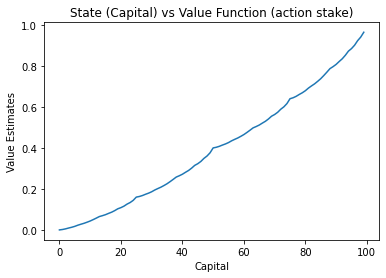

In [32]:
f_plot_valuefunction(V)

### Question 4
In order to see how the value function evolves through each sweep, change the function **value_iteration_for_gamblers** created in question 1, creating the function **value_iteration_for_gamblers_with_sweeps**, that uses the **f_plot_valuefunction** above to plot Value Estimates (action stake) vs State (Capital) for each sweep. 

In [33]:
# function to implement value iteration for the gambler’s problem
def value_iteration_for_gamblers_with_sweeps(p_h, theta=0.0001, discount_factor=1):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    rewards = np.zeros(101)
    rewards[100] = 1 

    #print (">>>>>>> rewards:", rewards)
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros(101)
    
    while True:
        # Stopping condition
        delta = 0.
        # Update each state...
        for s in range(1, 100):
            # Do a one-step lookahead to find the best action
            #print(">> state s: {}".format(s))
            A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
            # print(s,A,V) # if you want to debug.
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far    
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value 
            
        # plot Final Policy (action stake) vs State (Capital) for each sweep
        f_plot_valuefunction(V)
        # Check if we can stop 
        #print (">>>>>>> delta: {} < theta: {}", delta, theta)
        if delta < theta:
            break
    return V, rewards

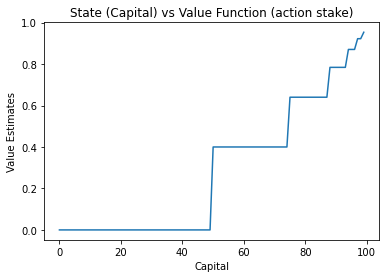

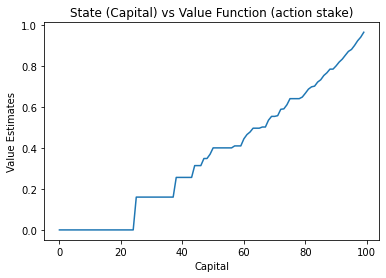

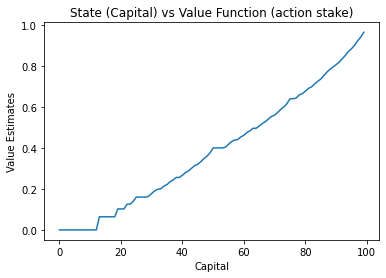

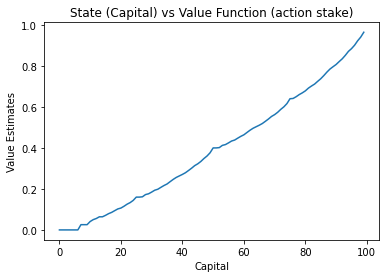

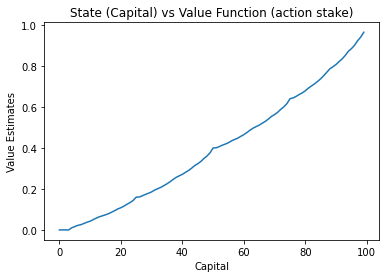

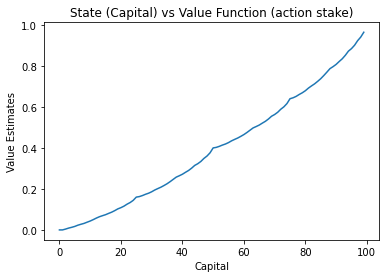

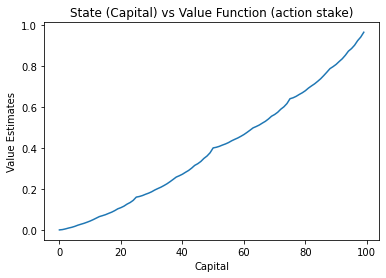

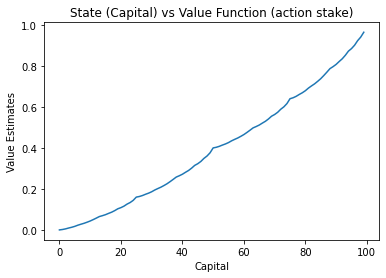

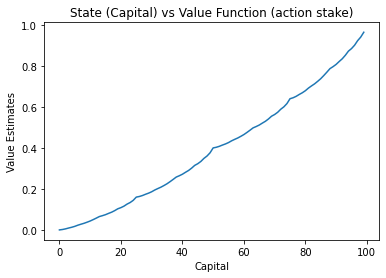

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 15.  9. 17.
  7. 19. 20. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40.  9.  8. 43. 44. 45.  4. 47.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.  9.  8. 18. 19. 20.  4.
 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.         0.00203162 0.00515507 0.00922512 0.01290418 0.01738208
 0.02306279 0.02781403 0.03227457 0.03767825 0.04346082 0.05035153
 0.05765757 0.06521897 0.06953507 0.07442925 0.08068842 0.08660695
 0.09421092 0.10313138 0.10865755 0.11596417 0.12587883 0.1335785
 0.1441471  0.16       0.16309304 0.16774251 0.17383767 0.17936474
 0.18607649 0.19459454 0.20172104 0.20841305 0.21652655 0.22519453
 0.2355273  0.24648826 0.25785582 0.2643026  0.27164589 0.28103263
 0.28991593 0.30131638 0.31471349 0.32298754 0.33394956 0.3488281
 0.36036974 0.

In [34]:
v, rewards = value_iteration_for_gamblers_with_sweeps(HEADS_PROBABILITY)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

### Question 5
Create a function to plot Optimal Policy vs State (Capital).

Why does the optimal policy for the gambler’s problem have such a curious
form? 

In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does
not. Why is this a good policy?

In [35]:
# Plotting Capital vs Final Policy
def f_plot_policy(policy_in):

    # x axis values
    x = range(100)
    print("Capital: {}".format(x))
    # corresponding y axis values
    y = policy_in
    print("Policy: {}".format(y))
 
    # plotting the bars
    plt.bar(x, y, align='center', alpha=0.5, width=1)
 
    # naming the x axis
    plt.xlabel('Capital')
    # naming the y axis
    plt.ylabel('Final policy (stake)')
 
    # giving a title to the graph
    plt.title('Capital vs Final Policy')
 
    # function to show the plot
    plt.show()
    return

Capital: range(0, 100)
Policy: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 15.  9. 17.
  7. 19. 20. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40.  9.  8. 43. 44. 45.  4. 47.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.  9.  8. 18. 19. 20.  4.
 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


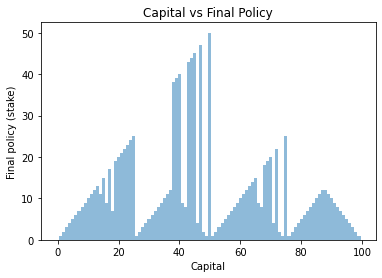

In [36]:
#policy = best_policy_for_gamblers(HEADS_PROBABILITY,V, rewards)
f_plot_policy(policy)

### Question 5 answer
In this problem, with p = 0.4, the coin is biased against the gambler. 

Because of this, the gambler want to minimize his number of flips. If he makes many small bets he is likely to lose. Thus, with a stake of 50 he can bet it all and have a .4 probability of winning. 

On the other hand, with stake of 51 he can do slightly better. If he bets 1, then even if he loses he still has 50 and thus a .4 chance of winning. And if he wins he ends up with 52. With 52 he can bet 2 and maybe end up with 54 etc. 

In these cases there is a chance he can get up to 75 without ever risking it all on one bet, yet he can always fall back (if he loses) on one big bet. And if he gets to 75 he can safely bet 25, possibly winning in one, while still being able to fall back to 50. It is this sort of logic which causes such big changes in the policy with small changes in stake, particularly at multiples of the negative powers of two.

#### What about the noise present in the plot?
The many spikes in the graph are caused by roundup errors on the floating point limitation of CPUs. The computer makes the wrong decision by truncationg the number after the 16th digit. 
ref. A Short Tutorial on Reinforcement Learning - Chengcheng Li & Larry Pyeatt (http://dl.ifip.org/db/conf/ifip12/iip2004/LiP04.pdf).

Below is a version of our function **value_iteration_for_gamblers** from question 1 that truncate up to the 16th decimal place when calculating the best actions the value, in order to minimize the noise. 
The plotted result shows the difference from the plot from question the result to see the difference from the previous plot.

### Question 5
The many spikes in the graph are caused by roundup errors on the floating point limitation of CPUs. The computer makes the wrong decision by truncationg the number after the 16th digit. 
ref. A Short Tutorial on Reinforcement Learning - Chengcheng Li & Larry Pyeatt (http://dl.ifip.org/db/conf/ifip12/iip2004/LiP04.pdf).

Change the function **value_iteration_for_gamblers** from question 1 and create a function **value_iteration_for_gamblers_reduced_noise** to truncate up to the 16th decimal place when calculating the best actions the value, in order to minimize the noise. 

The plot below show the difference from the one above.

In [37]:
def max_reduced_noise(A):
    pass

In [38]:
# OK function to implement value iteration for the gambler’s problem
def value_iteration_for_gamblers_reduced_noise(p_h, theta=1e-32, discount_factor=1):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    rewards = np.zeros(101)
    rewards[100] = 1 

    #print (">>>>>>> rewards:", rewards)
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros(101)
    
    while True:
        # Stopping condition
        delta = 0.
        # Update each state...
        for s in range(1, 100):
            # Do a one-step lookahead to find the best action
            #print(">> state s: {}".format(s))
            A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
            # print(s,A,V) # if you want to debug.
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far    
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value 
        # Check if we can stop 
        #print (">>>>>>> delta: {} < theta: {}", delta, theta)
        if delta < theta:
            break
    return V, rewards

Capital: range(0, 100)
Policy: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


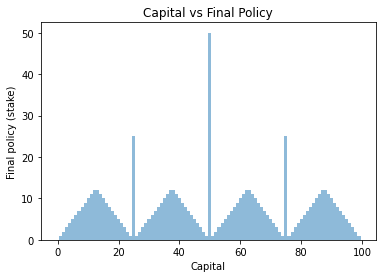

In [39]:
v, rewards = value_iteration_for_gamblers_reduced_noise(HEADS_PROBABILITY)

policy = best_policy_for_gamblers(HEADS_PROBABILITY,v, rewards)
f_plot_policy(policy)